In [1]:
import os
import pandas as pd
import datetime
import numpy as np
from datetime import date
import config
from scraper import BoligScraper
from integrator import Integrator
from preprocessor import Preprocessor
pd.options.display.max_columns = 500

# Scrape Boligsiden.dk

In [ ]:
scraper = BoligScraper()
scraper.scrape_listings()

# Load Latest Scraping Job

In [ ]:
scraping_jobs = os.listdir('./data/scraping_jobs/')
df = pd.read_pickle('./data/scraping_jobs/{}'.format(scraping_jobs[-1]))
df.head(5)

# Clean columns

In [ ]:
preprocessor = Preprocessor()
df = preprocessor.process(df)

# Analysis

In [25]:
df_on = pd.read_pickle('./data/database/db_on_market.pkl')
df_off = pd.read_pickle('./data/database/db_off_market.pkl')
df_new = pd.read_pickle('./data/database/db_new_on_market.pkl')

preprocessor = Preprocessor()
df_on = preprocessor.process(df_on)
df_off = preprocessor.process(df_off)
df_new = preprocessor.process(df_new)

In [26]:
new = df_new.groupby('dateOn').id.agg('count').rename('new')
off = df_off.groupby('dateOff').id.agg('count').rename('off')

(array([737640., 737641., 737642., 737643., 737644., 737645., 737646.,
        737647., 737648.]),
 <a list of 9 Text major ticklabel objects>)

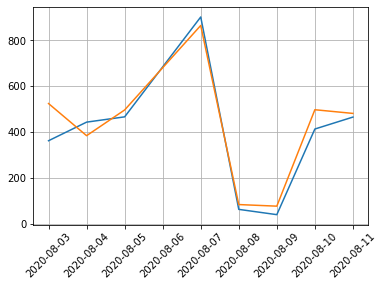

In [27]:
import matplotlib.pyplot as plt
plt.plot(new)
plt.plot(off)
plt.grid()
plt.xticks(rotation=45)